In [11]:
from glob import glob
from pathlib import Path
import re

In [30]:
lr = re.compile(r"(?:[0-9]+\.)?[0-9]+(?:e[+-][0-9]{2})?")

runs = {}

for fn in glob("./rebforces/test/simon/simon_simulations_20220708_1/iopf_csim*/output.txt"):
    p = Path(fn)
    run = p.parent.name

    with open(p, "r") as f:
        lines = f.readlines()
        runs[run] = {
            "t": [],
            "a": [],
            "e": []
        }
        for i in range(0, len(lines), 7):
            runs[run]["t"].append(float(re.findall(lr, lines[i])[0]))
            runs[run]["a"].append(float(re.findall(lr, lines[i+5])[0]))
            runs[run]["e"].append(float(re.findall(lr, lines[i+5])[1]))

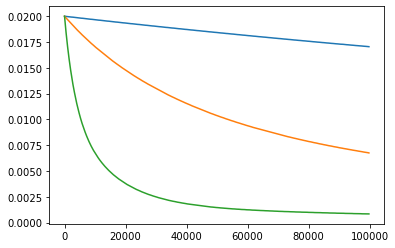

In [38]:
import matplotlib.pyplot as plt
import numpy as np

r0 = runs["iopf_csim_DRAG_1.0_0.2_0.02_1.0"]
r1 = runs["iopf_csim_DRAG_0.1_0.2_0.02_1.0"]
r2 = runs["iopf_csim_DRAG_0.01_0.2_0.02_1.0"]

plt.plot(r0["t"], r0["e"])
plt.plot(r1["t"], r1["e"])
plt.plot(r2["t"], r2["e"])

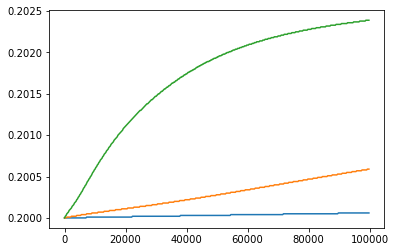

In [36]:
plt.plot(r0["t"], r0["a"])
plt.plot(r1["t"], r1["a"])
plt.plot(r2["t"], r2["a"])